In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
data_path = 'Database/ChatGPT_ Quality of AI-Driven Services in Education  (Responses) - Form Responses.csv'  # Update with your file path
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Initial Dataset:\n", df.head())

Initial Dataset:
      Usage Time Quality of Learning Response Accuracy and Reliability  \
0  Occasionally               Agree                             Agree   
1         Daily               Agree                             Agree   
2        Rarely      Strongly Agree                           Neutral   
3         Daily             Neutral                           Neutral   
4         Daily      Strongly Agree                    Strongly agree   

  Reducing Direct Teacher Interaction Reliability Issues  \
0                               Agree               Rare   
1                               Agree               Rare   
2                            Disagree           Frequent   
3                               Agree            Neutral   
4                      Strongly agree          Very Rare   

  Responses Without Delays Topics Understanding Confidence   \
0                     Rare                          Neutral   
1            Very Frequent                   Strongly Ag

In [3]:
# Step 1: Convert Non-Numerical Columns to Numerical Values
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("\nDataset after Label Encoding:\n", df.head())


Dataset after Label Encoding:
    Usage Time  Quality of Learning  Response Accuracy and Reliability  \
0           1                    0                                  0   
1           0                    0                                  0   
2           2                    3                                  2   
3           0                    2                                  2   
4           0                    3                                  3   

   Reducing Direct Teacher Interaction  Reliability Issues  \
0                                    0                   2   
1                                    0                   2   
2                                    1                   0   
3                                    0                   1   
4                                    3                   4   

   Responses Without Delays  Topics Understanding Confidence   \
0                         2                                 2   
1                         

In [4]:
# Step 2: Data Cleaning
# Handling missing values
df.fillna(df.mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Step 3: Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Usage Time  Quality of Learning  Response Accuracy and Reliability  \
count   35.000000            35.000000                          35.000000   
mean     1.114286             0.942857                           1.200000   
std      1.254906             1.327157                           1.106133   
min      0.000000             0.000000                           0.000000   
25%      0.000000             0.000000                           0.000000   
50%      1.000000             0.000000                           2.000000   
75%      2.500000             2.500000                           2.000000   
max      3.000000             3.000000                           3.000000   

       Reducing Direct Teacher Interaction  Reliability Issues  \
count                            35.000000           35.000000   
mean                              1.028571            2.028571   
std                               1.224402            1.224402   
min             

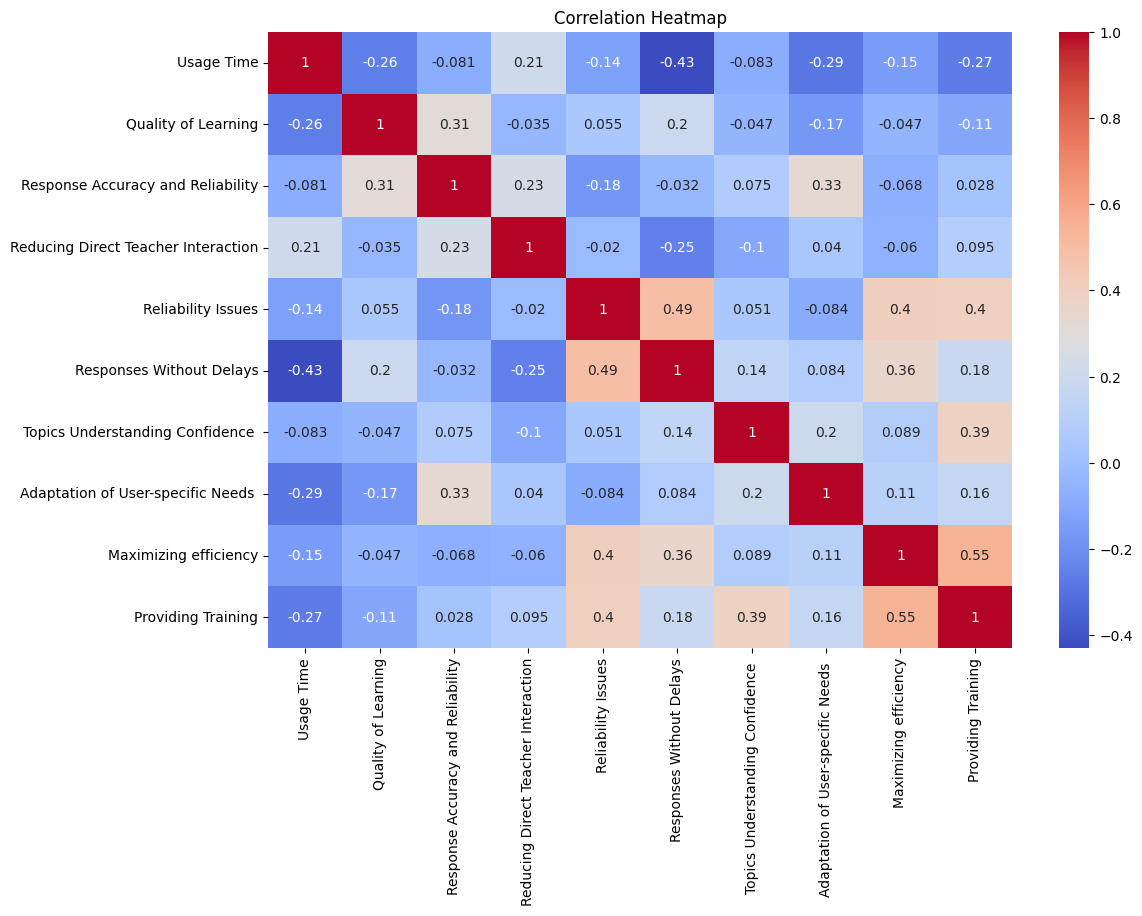

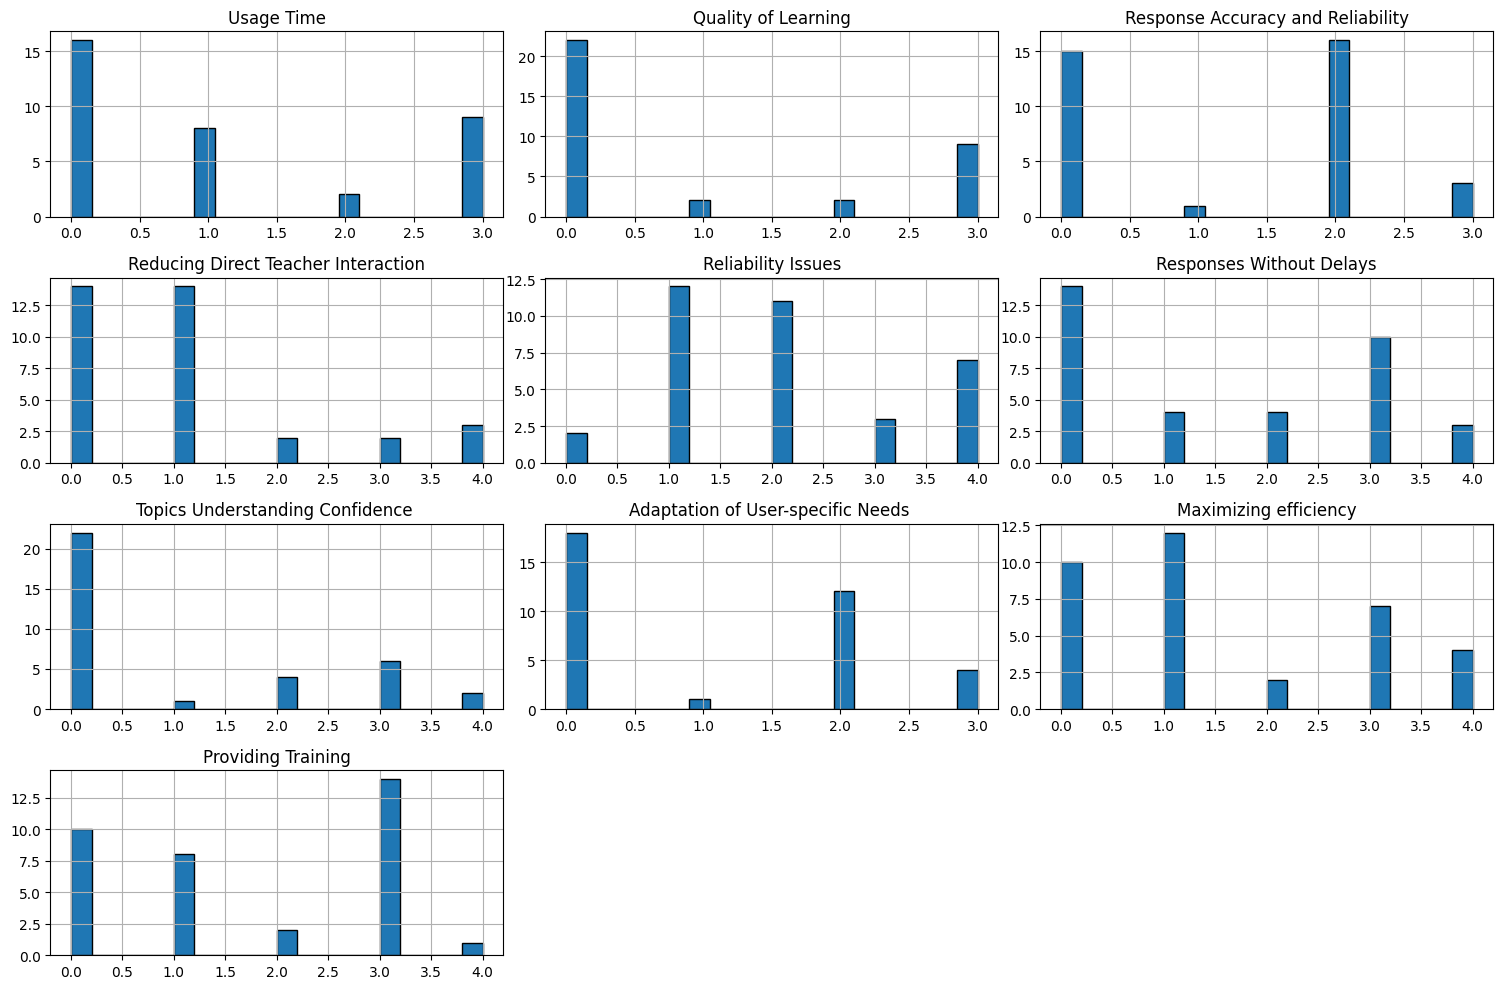

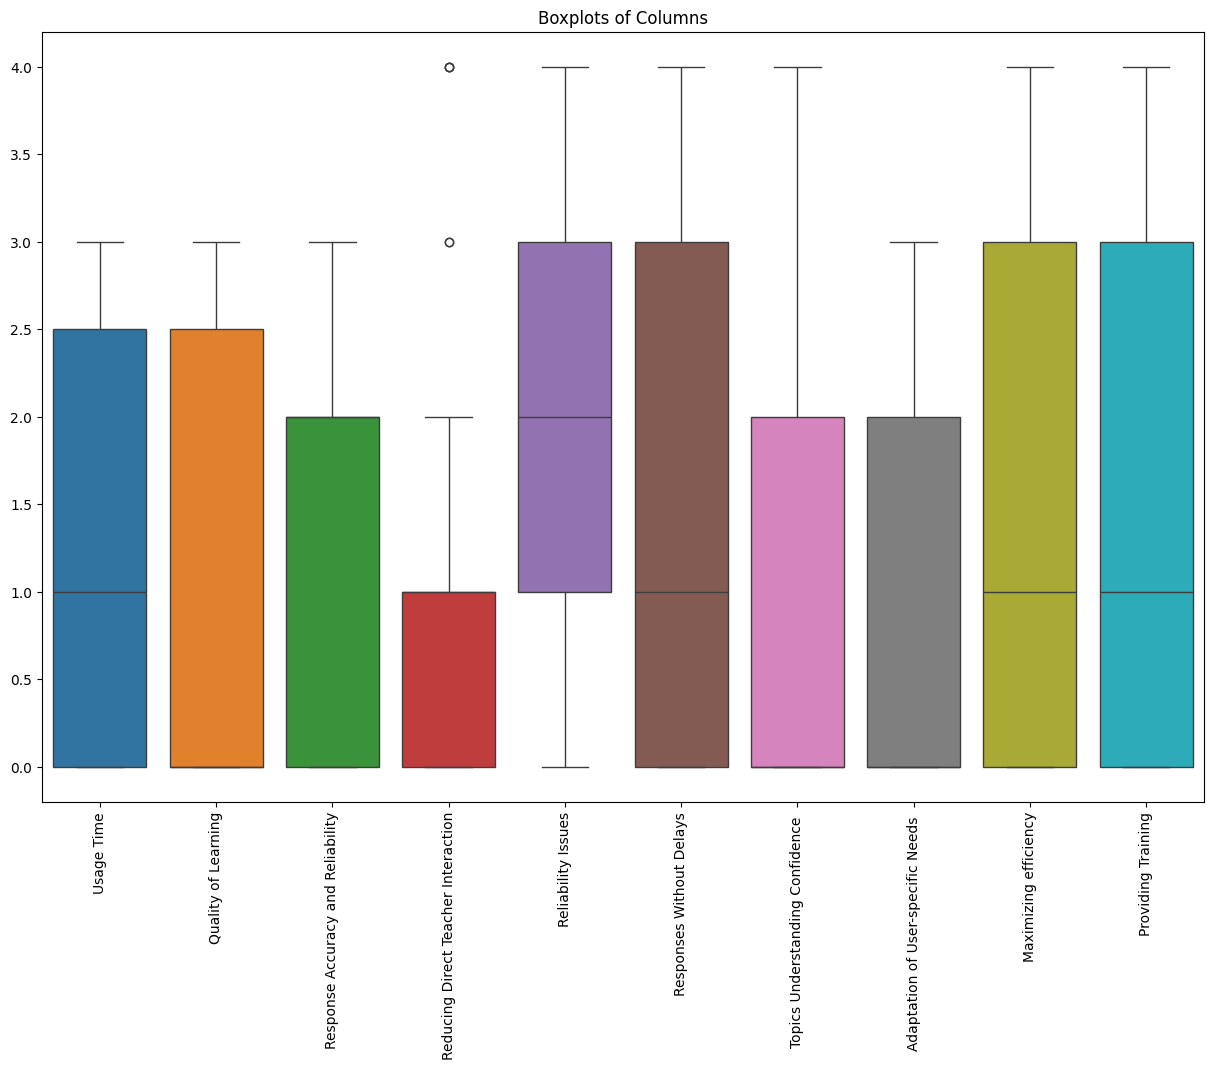

In [6]:
# Step 4: Data Visualization
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histogram for each column
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplot for each column
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplots of Columns')
plt.show()

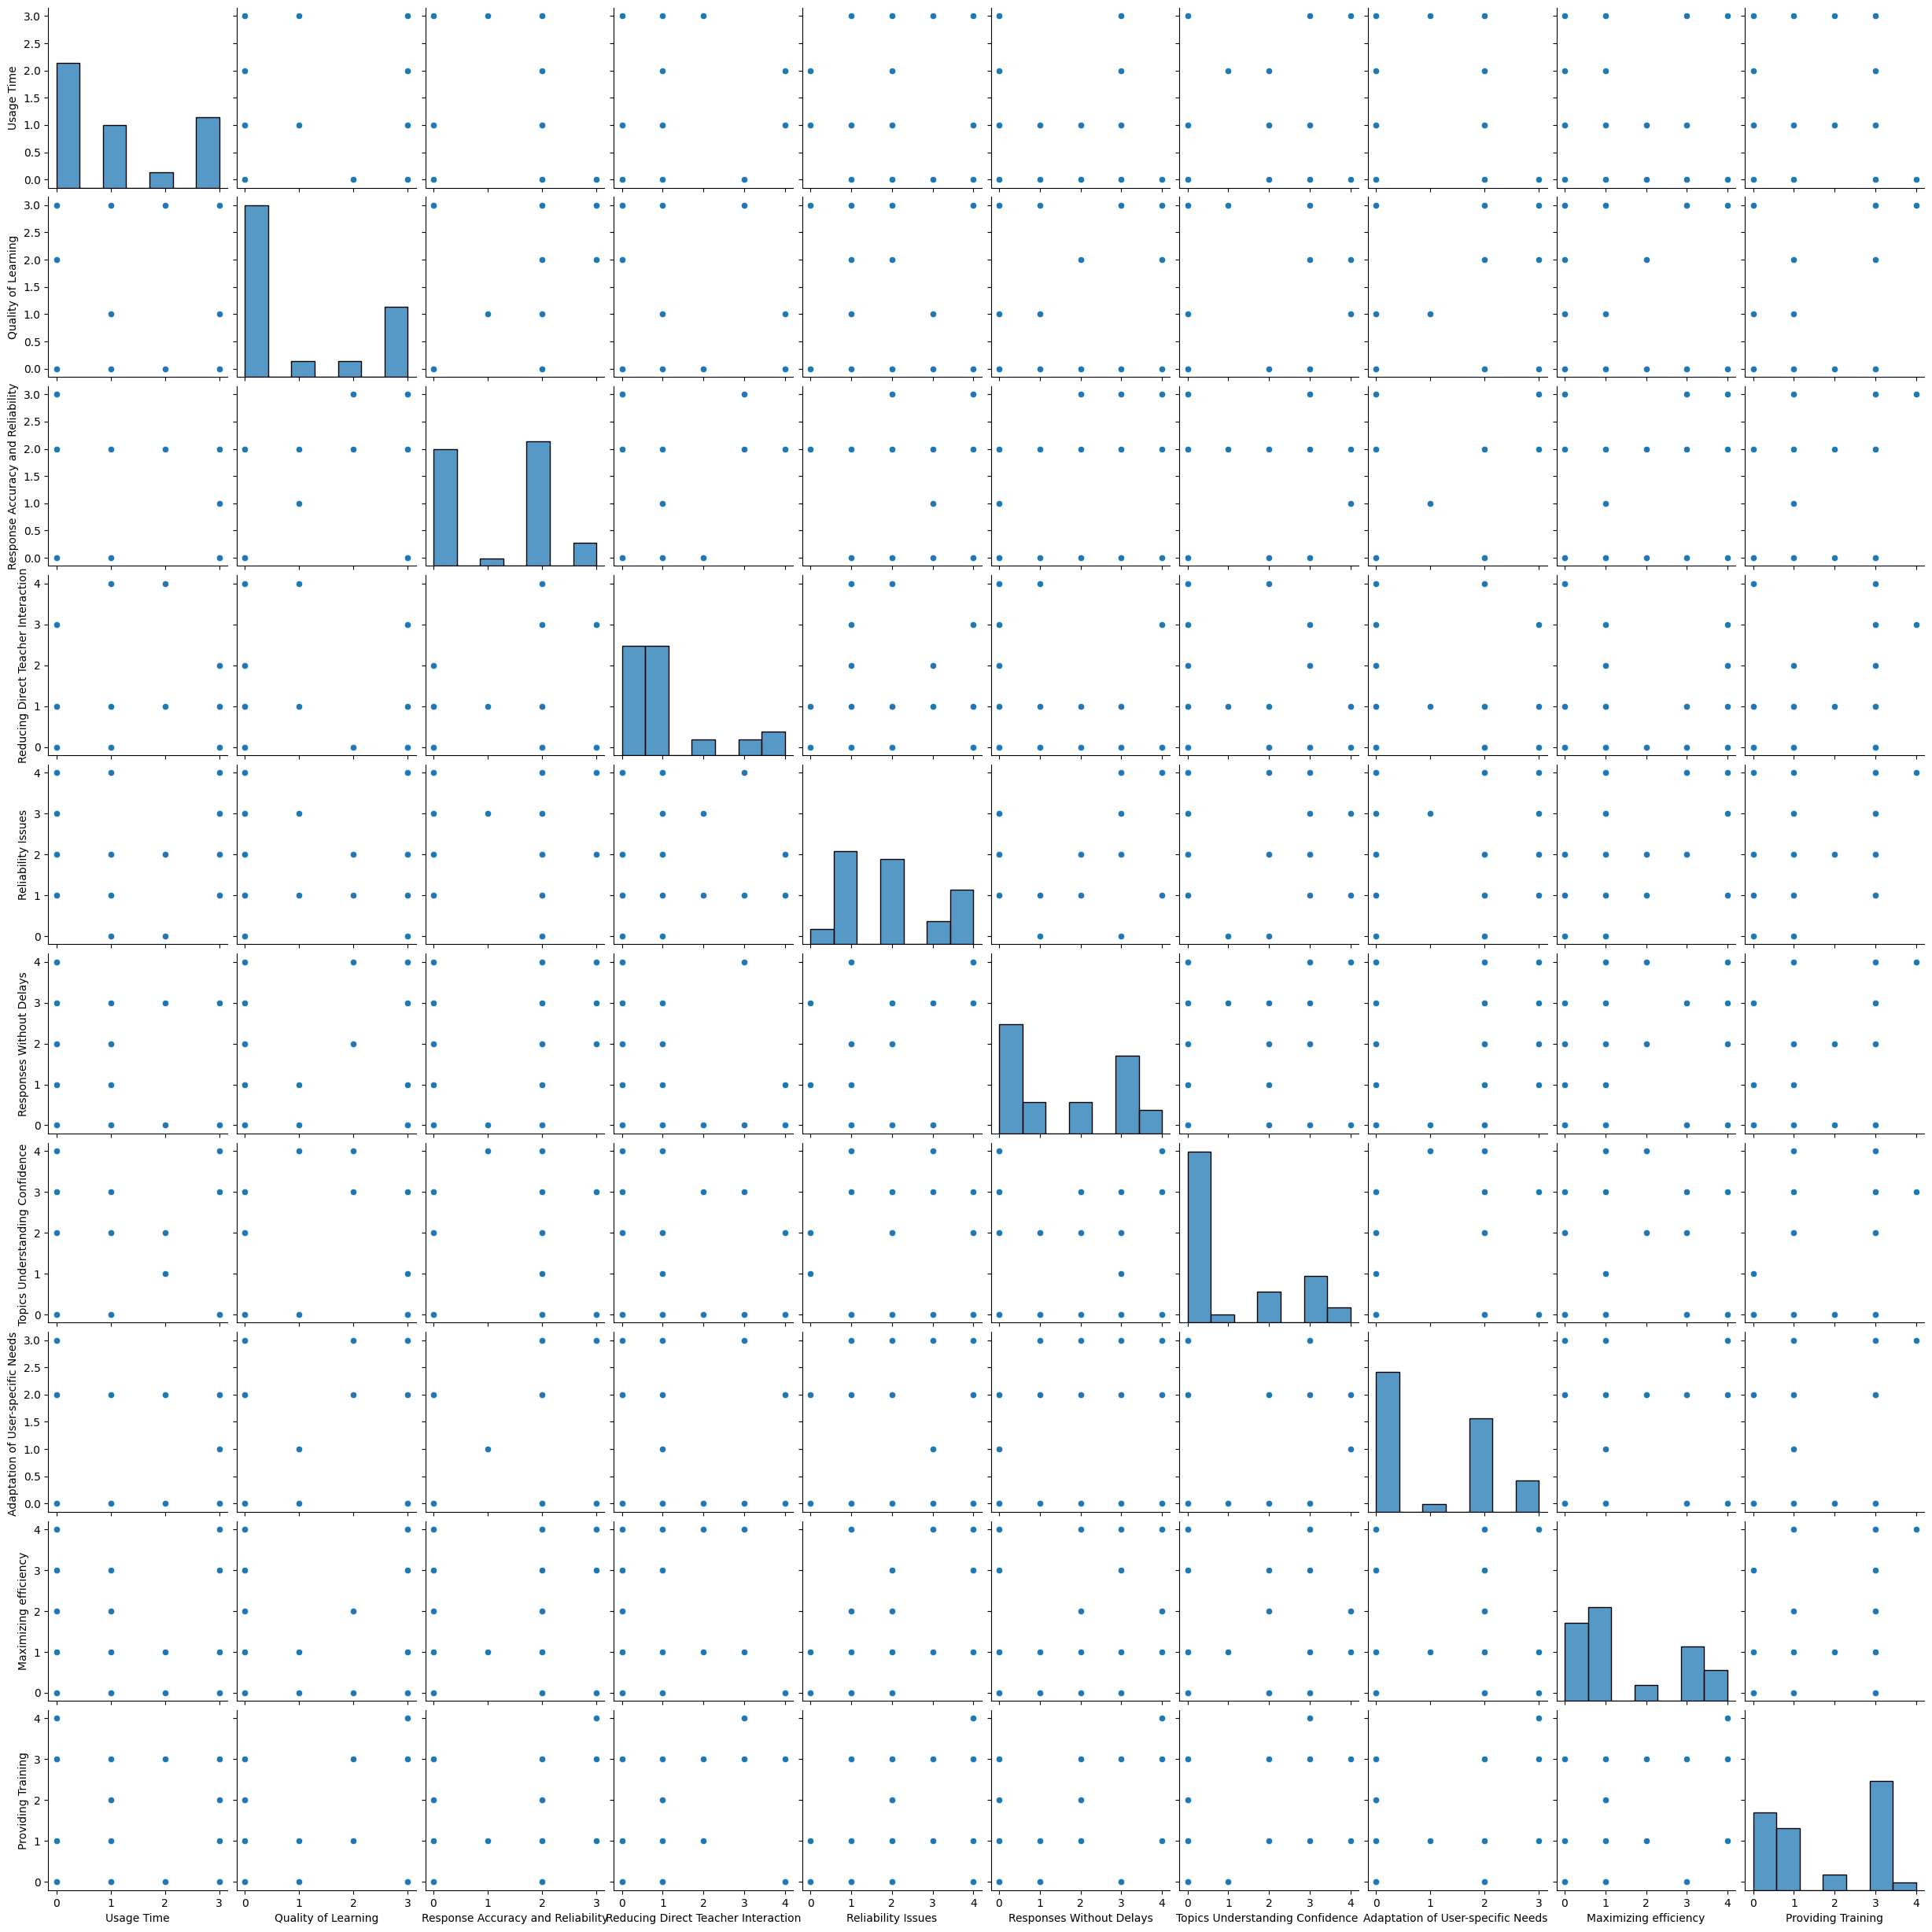

In [7]:
# Step 5: Advanced Analysis
# Pairplot
sns.pairplot(df)
plt.show()

In [8]:
# Step 6: Logistic Regression Analysis
# Define target and features
target_column = 'Quality of Learning'  # Replace with actual target column if applicable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Model evaluation
y_pred = log_reg.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.28      0.28      0.28         7
weighted avg       0.71      0.71      0.71         7


Confusion Matrix:
 [[5 1 0]
 [0 0 0]
 [1 0 0]]

Feature Importance:
 Providing Training                     0.831858
Usage Time                             0.624141
Adaptation of User-specific Needs      0.559983
Maximizing efficiency                  0.086232
Responses Without Delays              -0.113348
Reliability Issues                    -0.131312
Reducing Direct Teacher Interaction   -0.325934
Topics Understanding Confidence       -0.667023
Response Accuracy and Reliability     -0.774491
dtype: float64


f:\Python Home Practice\MIS Course Term Paper\ChatGPTServicesInEducation\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Python Home Practice\MIS Course Term Paper\ChatGPTServicesInEducation\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Python Home Practice\MIS Course Term Paper\ChatGPTServicesInEducation\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di